In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob
import random
import keras
%matplotlib inline

Using TensorFlow backend.


# 1/ Explore data

In [2]:
val_dir = 'data/processed/valid'
val_data = glob.glob(val_dir + "/*")

train_dir = 'data/processed/train'
train_data = glob.glob(train_dir + "/*")

print("Train data: {}\nValidation data: {}".format(len(train_data), len(val_data)))

Train data: 4491
Validation data: 1126


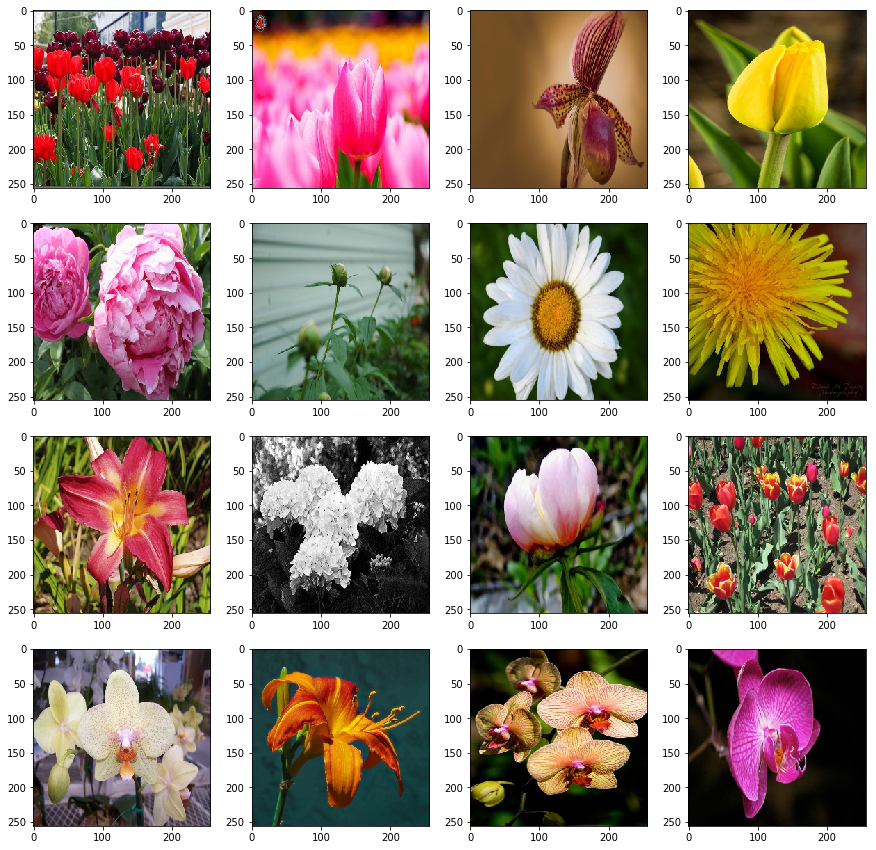

In [3]:
lines, columns = 4, 4
_, axs = plt.subplots(lines, columns, figsize=(15, 15))
for i in range(lines):
    for j in range(columns):
        img=mpimg.imread(random.choice(train_data))
        axs[i, j].imshow(img)

# 2/ Evaluate predictions

In [4]:
# Load model
model_path = "model/saved/model_3layers.hdf5"
width, height = 256, 256
model = keras.models.load_model(model_path)

In [5]:
# Load sample images
test_data = val_data #TODO use black & white pictures

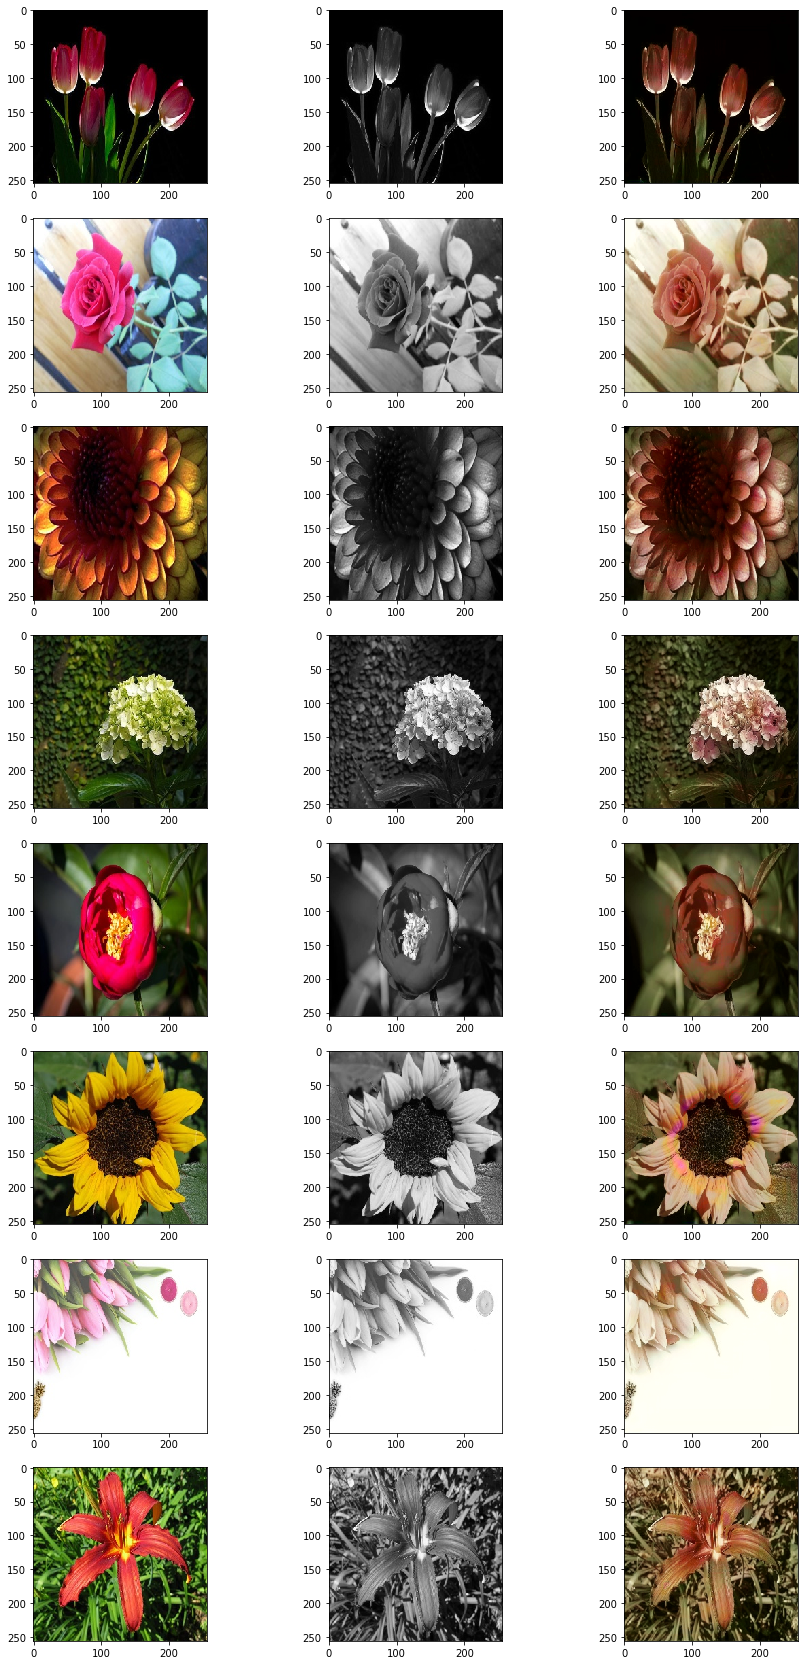

In [10]:
lines, columns = 8, 3
_, axs = plt.subplots(lines, columns, figsize=(15, 30))

for i in range(lines):
        
    img_path = random.choice(test_data)

    # Read and resize image
    img_BGR = cv2.imread(img_path)
    img_BGR = cv2.resize(img_BGR, (width, height))
    img_original = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)

    # Convert to gray
    img_gray = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2GRAY)
    img_input = img_gray
    img_gray = img_gray.reshape((1,width,height))

    # Preprocess image
    img_gray = img_gray / 127.5 - 1

    # Predict CrCb channels
    img_CrCb = model.predict(img_gray)[0]

    # Reconstitute image
    img_gray = img_gray[0]
    img_YCrCb = np.dstack((img_gray, img_CrCb))
    img_YCrCb = (img_YCrCb + 1) * 127.5
    img_YCrCb = img_YCrCb.astype(np.uint8)

    # Convert to RGB
    img_output = cv2.cvtColor(img_YCrCb, cv2.COLOR_YCrCb2RGB)
    
    # Display images
    axs[i, 0].imshow(img_original)
    axs[i, 1].imshow(img_gray, cmap='gray')
    axs[i, 2].imshow(img_output)